# DERLA data analysis 

Prototypical data analysis of the DERLA project: https://gams.uni-graz.at/context:derla

## Research questions / assumptions to answer

### General

1. Remembrance culture is equal across political / religious belonging. 
2. Remembrance culture is many-sided across place types.
3. Remembrance culture is not biased towards today's political affiliation / boundaries (states)


### Follow up assumptions

1. The defined categories are evenly distributed overall.
2. Defined categories are evenly distributed across different states (styria, vorarlberg)


#### Following the map on DERLA

1. Many places (in Styria) belong to the category soldiers
2. (The categories are somewhat evenly distributed.)


## Basic Steps

0. (Load data from GAMS)
1. Import pandas
2. Load derla data as .csv
3. Do some analysis with the data
4. Mimic SQL analysis 
5. Visualizations

In [157]:
import pandas as pd
import os
import seaborn as sns
# show viz inline in jupyter notebooks
%matplotlib inline
# customize seaborn global styling
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

## Load data
- (should be done accessing a Digital Archive / trusted repo like GAMS) 
- (refactor to format pandas understands)
- parse as dataframe

In [160]:
derla_df = pd.read_csv("derla.csv")
derla_df.index.names = ["global_count"] # naming the index
derla_df.head() # show table head

,Name,link,state,Description,type of sign,TimeStamp,Latitude,Longitude,uri,category of sign,categories of place,availability,Address,women,adolescents
global_count,,,,,,,,,,,,,,,
0,Gedenktafel Seekapelle Bregenz,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,"Am 11. März 1988; 50 Jahre nach dem ""Anschluss...",Gedenktafel,1988,47.503146,9.747139,https://gams.uni-graz.at/o:derla.vor3,Kollektiv,Kollektiv;,Öffentlich zugänglich,Rathausplatz 4; 6900 Bregenz,Frauen explizit erwähnt,Jugendliche explizit erwähnt
1,Gedenkweg-Station: Seekapelle Bregenz,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,"Am 11. März 1988; 50 Jahre nach dem ""Anschluss...",Gedenktafel,2002,47.503146,9.747139,https://gams.uni-graz.at/o:derla.vor4,Kollektiv,Kollektiv;,Öffentlich zugänglich,Rathausplatz 4; 6900 Bregenz,Frauen explizit erwähnt,Jugendliche explizit erwähnt
2,Gedenkweg-Station: Gestapo-Hauptquartier Bregenz,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,In der Römerstraße 7 befand sich zwischen 1938...,Gebäude,2002,47.501845,9.745755,https://gams.uni-graz.at/o:derla.vor5,Orte des Terrors - Gefängnis,Orte des Terrors - Gefängnis;Kollektiv;,Öffentlich zugänglich,Römerstraße 7; 6900 Bregenz,NaN,NaN
3,Gedenktafel Gefängnis Bregenz Oberstadt,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,Zwischen 1938 und 1945 waren im Gefangenenhaus...,Gedenktafel,1985,47.499696,9.749943,https://gams.uni-graz.at/o:derla.vor6,Orte des Terrors - Gefängnis,Orte des Terrors - Gefängnis;Kollektiv;,Öffentlich zugänglich,Amtsplatz 1; 6900 Bregenz,NaN,NaN
4,Gedenkweg-Station: Gefängnis Bregenz Oberstadt,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,Zwischen 1938 und 1945 waren im Gefangenenhaus...,Gedenktafel,2002,47.499658,9.749809,https://gams.uni-graz.at/o:derla.vor7,Orte des Terrors - Gefängnis,Orte des Terrors - Gefängnis;Kollektiv;,Öffentlich zugänglich,Amtsplatz 1; 6900 Bregenz,NaN,NaN


## Exploratory data analysis

Total count of place of remembrances in Austria

In [150]:
# total counts of places 
derla_df.count()[0]

671

Display the place counts per state.

<AxesSubplot:xlabel='state'>

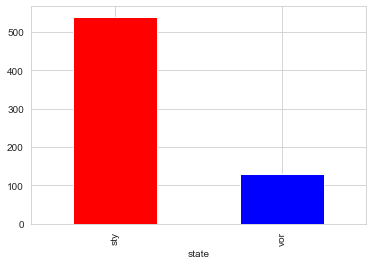

In [153]:
# place-count by state
perstate_count = derla_df.value_counts("state")
perstate_count.plot.bar(color=("red", "blue"))

Places grouped according to unique dates

<AxesSubplot:xlabel='TimeStamp'>

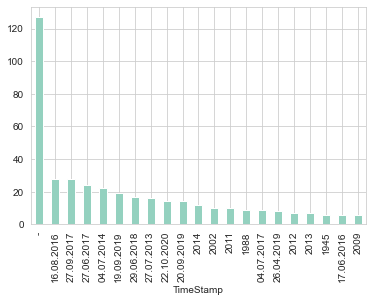

In [210]:
# places grouped by date of sign
timestamps = derla_df.value_counts("TimeStamp")
timestamps[timestamps > 5].plot.bar() # display only count higher 5

# sns.heatmap(new)
# Display more same as value counts / all dates that are not unique
# most of the dates are unknown! and marked as '-' -> not recognized as null by pandas
# some dates are full / some have only years
# grouped_dates = derla_df.groupby("TimeStamp").count()[derla_df.groupby("TimeStamp").count() > 1].dropna(thresh=5).sort_values(by="Name", ascending=False)
# grouped_dates

Insights:
1. There seems to be a bias towards higher dates.
2. Sometimes there are only year values.
3. Highest count has date '_' -> not recognized as null

Check null values inside given table

<AxesSubplot:ylabel='global_count'>

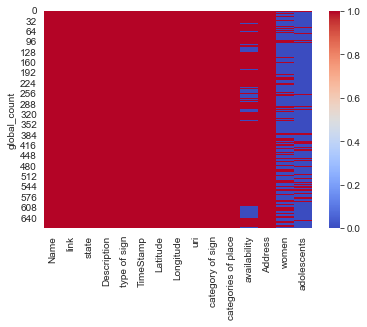

In [211]:
sns.heatmap(data=derla_df.notna(), cmap="coolwarm") 

Insight(s):
1. In three columns there are a lot of null values
2. Null values seem to cluster at women and adolescents

Analyze found null values - are the columns meant as boolean values? 

In [215]:
# create a new dataframe with all available unique values for the cols 'under suspicion'
new_df = pd.DataFrame()
new_df['av'] = derla_df['availability'].unique()
new_df['women'] = derla_df['women'].unique()
new_df['adolescents'] = derla_df['adolescents'].unique()
new_df

,av,women,adolescents
0,Öffentlich zugänglich,Frauen explizit erwähnt,Jugendliche explizit erwähnt
1,NaN,NaN,NaN


Insight(s)
1. all columns are binary / most likely meant as boolean values
   

## Feature-Engineering: Enrich data / Add additional cols

e.g. add additional columns / change values / enrich with reasonable values like averages etc.

Maybe interesting features for DERLA to be added via feature-engineering

Derla places:
1. Age of linked person(s) - Mean age?
2. Postal codes
3. Year (seperate from complete date)
4. Supercategory
5. Additional categories
6. Count of persons per place
7. Descriptive Text length per place
8. Text itself

Derla victims
1. Age
2. Supercategory
3. Postal codes
4. Year
5. Text?


Possible Logistic Regression / Machine Learning
1. Able to predict category according to descriptive text?

### Add postal code

In the DERLA dataframe the __postal code should be encoded seperately__.
(Still need to handle potentially dirty data)

In [272]:
#
# places grouped by postal code
#

import re

def extract_postal(addr):
    """
    Extracts the postal code from address field.
    Returns None if not found
    """
    res = re.findall(r"\d{4}", addr)
    try:
        return res[0]
    except:
        return None

# get postal codes from address statements
postal_col = derla_df["Address"].apply(extract_postal)
# add as column to the original dataframe
derla_df["postal"] = postal_col
derla_df

,Name,link,state,Description,type of sign,TimeStamp,Latitude,Longitude,uri,category of sign,categories of place,availability,Address,women,adolescents,postal
global_count,,,,,,,,,,,,,,,,
0,Gedenktafel Seekapelle Bregenz,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,"Am 11. März 1988; 50 Jahre nach dem ""Anschluss...",Gedenktafel,1988,47.503146,9.747139,https://gams.uni-graz.at/o:derla.vor3,Kollektiv,Kollektiv;,Öffentlich zugänglich,Rathausplatz 4; 6900 Bregenz,Frauen explizit erwähnt,Jugendliche explizit erwähnt,6900
1,Gedenkweg-Station: Seekapelle Bregenz,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,"Am 11. März 1988; 50 Jahre nach dem ""Anschluss...",Gedenktafel,2002,47.503146,9.747139,https://gams.uni-graz.at/o:derla.vor4,Kollektiv,Kollektiv;,Öffentlich zugänglich,Rathausplatz 4; 6900 Bregenz,Frauen explizit erwähnt,Jugendliche explizit erwähnt,6900
2,Gedenkweg-Station: Gestapo-Hauptquartier Bregenz,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,In der Römerstraße 7 befand sich zwischen 1938...,Gebäude,2002,47.501845,9.745755,https://gams.uni-graz.at/o:derla.vor5,Orte des Terrors - Gefängnis,Orte des Terrors - Gefängnis;Kollektiv;,Öffentlich zugänglich,Römerstraße 7; 6900 Bregenz,NaN,NaN,6900
3,Gedenktafel Gefängnis Bregenz Oberstadt,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,Zwischen 1938 und 1945 waren im Gefangenenhaus...,Gedenktafel,1985,47.499696,9.749943,https://gams.uni-graz.at/o:derla.vor6,Orte des Terrors - Gefängnis,Orte des Terrors - Gefängnis;Kollektiv;,Öffentlich zugänglich,Amtsplatz 1; 6900 Bregenz,NaN,NaN,6900
4,Gedenkweg-Station: Gefängnis Bregenz Oberstadt,"<a target=""_blank"" href=""https://gams.uni-graz...",vor,Zwischen 1938 und 1945 waren im Gefangenenhaus...,Gedenktafel,2002,47.499658,9.749809,https://gams.uni-graz.at/o:derla.vor7,Orte des Terrors - Gefängnis,Orte des Terrors - Gefängnis;Kollektiv;,Öffentlich zugänglich,Amtsplatz 1; 6900 Bregenz,NaN,NaN,6900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Grabmal von Dora Kallmus,"<a target=""_blank"" href=""https://gams.uni-graz...",sty,Die Geschwister Anna und Dora Kallmus lebten b...,Grab,11.11.2020,47.058340,15.414630,https://gams.uni-graz.at/o:derla.sty538,Jüdische Opfer - Israelitische Kultusgemeinde,Jüdische Opfer - Israelitische Kultusgemeinde;,NaN,Jüdischer Friedhof; Wetzelsdorfer Straße 33/Al...,Frauen explizit erwähnt,NaN,8052
667,Zwangsarbeitslager der Veitscher Magnesitwerke AG,"<a target=""_blank"" href=""https://gams.uni-graz...",sty,Erste Kriegsgefangene scheinen ab Jänner 1941 ...,Ort ohne Zeichen,-,47.586004,15.474341,https://gams.uni-graz.at/o:derla.sty539,ZwangsarbeiterInnen,ZwangsarbeiterInnen;,NaN,Magnesitgasse 2; 8664 Großveitsch/St. Barbara ...,NaN,NaN,8664
668,Zwangsarbeitslager der Lapp-Finze AG Kalsdorf,"<a target=""_blank"" href=""https://gams.uni-graz...",sty,Die Lapp-Finze AG (heute Roto Frank Austria Gm...,Ort ohne Zeichen,-,46.967400,15.478461,https://gams.uni-graz.at/o:derla.sty540,ZwangsarbeiterInnen,ZwangsarbeiterInnen;,NaN,Lapp-Finze-Straße 21; 8401 Kalsdorf bei Graz,NaN,NaN,8401


In the process of feature engineering a __column for postal code__ was added to the original data-frame.

## Aggregational analysis

Analysis according to __proportions and hierarchical__ structure of the data.

groupby, value_counts etc. in regards to assigned states / categories / type of places

Count of all signs per type:

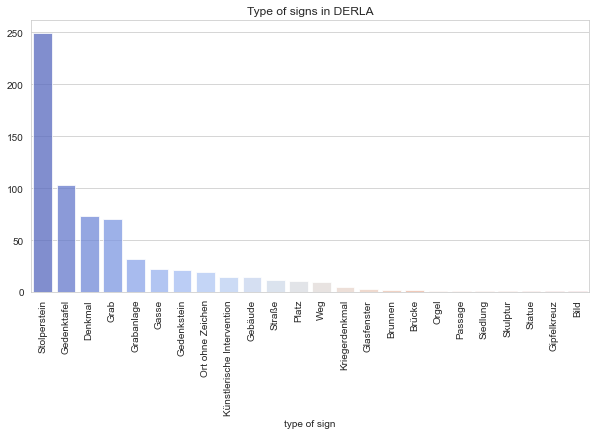

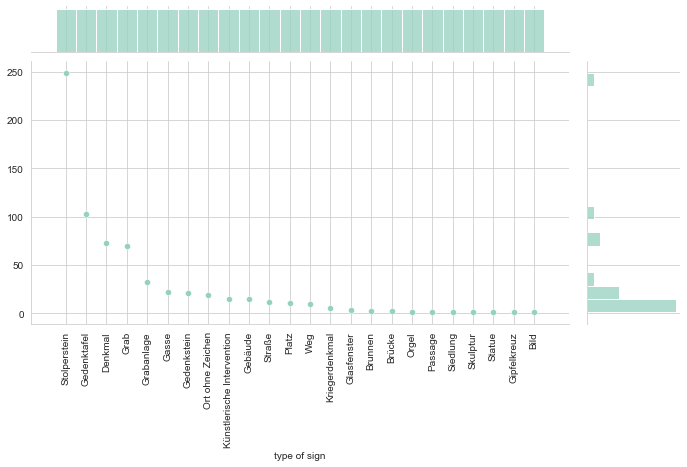

In [219]:
typesigns_counts = derla_df.value_counts("type of sign")
plt = sns.barplot(x=typesigns_counts.index, y=typesigns_counts.values, alpha=0.75, palette="coolwarm", capsize=5)
# plot customization
plt.set_xticklabels(plt.get_xticklabels(),rotation = 90)
plt.figure.set_size_inches(10,5)
plt.set_title("Type of signs in DERLA")
# second plot
plt2 = sns.jointplot(x=typesigns_counts.index,y=typesigns_counts.values,data=typesigns_counts, kind="scatter")
plt2.figure.set_size_inches(10,5)
for tick in plt2.ax_joint.get_xticklabels(): tick.set_rotation(90)


Insight(s):
1. Stolperstein / Gedenktafel / Denkmal / Grab are over -- rest under 50
2. Stolperstein is by far assigned most often
3. Most of type assignments are in a rang from 0-10

Basic __statistical information__ (mean, count, standarddeviation etc.) about the places and their sign-type

count     24.000000
mean      27.958333
std       54.074409
min        1.000000
25%        1.000000
50%       10.500000
75%       21.250000
max      249.000000
dtype: float64


<AxesSubplot:>

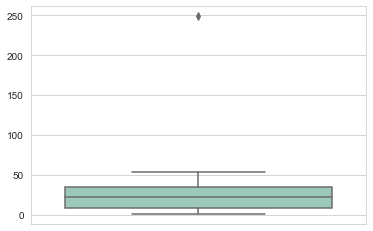

In [273]:
print(typesigns_counts.describe())
sns.boxplot(data=typesigns_counts.describe(), y=typesigns_counts.describe().index)

<AxesSubplot:>

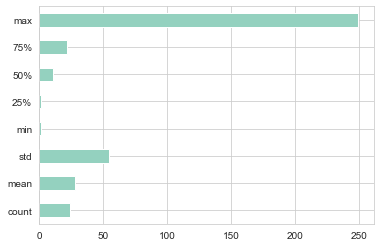

In [268]:
typesigns_counts.describe().plot.barh() # display as horizontal bar

Insight(s):
1. 75% of the sign-types have under 25 places assigned
2. 95% of the sign-types have under 50 places assigned

### Multi hierarchical indexing of places per state

Creating a multi-hierarchy dataframe for the derla data. Proceedgin with with the hierarchical / proportional analysis.


Each place should be __hierarchically assigned__ to the __containing state__. __Creates derla_dfhier dataframe__ where hierarchical indexing was applied.

In [281]:
# type of signs per state
derla_df.index.names = ["global_count"]

# construct an hierarchical index
indices = list(derla_df.index)
states = list(derla_df["state"]) 
hier_tuples = list(zip(states,indices))
hier_index = pd.MultiIndex.from_tuples(hier_tuples,names=["state", "global_count"])

# hierarchical indexation according to state
joined = derla_df.reindex(hier_index).join(derla_df, on="global_count", lsuffix=":left", how="inner")
derla_dfhier = joined.dropna(axis=1, thresh=4)
derla_dfhier.to_csv("demo_export.csv")
derla_dfhier

Name  \
state global_count                                                      
vor   0                                Gedenktafel Seekapelle Bregenz   
      1                         Gedenkweg-Station: Seekapelle Bregenz   
      2              Gedenkweg-Station: Gestapo-Hauptquartier Bregenz   
      3                       Gedenktafel Gefängnis Bregenz Oberstadt   
      4                Gedenkweg-Station: Gefängnis Bregenz Oberstadt   
...                                                               ...   
sty   666                                    Grabmal von Dora Kallmus   
      667           Zwangsarbeitslager der Veitscher Magnesitwerke AG   
      668               Zwangsarbeitslager der Lapp-Finze AG Kalsdorf   
      669           Zwangsarbeitslager des Stahlwerks Böhler Kapfe...   
      670           Gebäude mit Gedenktafel benannt nach Samuel St...   

                                                                 link state  \
state global_count                                                            
vor   0             <a target="_blank" href="https://gams.uni-graz...   vor   
      1             <a target="_blank" href="https://gams.uni-graz...   vor   
      2             <a target="_blank" href="https://gams.uni-graz...   vor   
      3             <a target="_blank" href="https://gams.uni-graz...   vor   
      4             <a target="_blank" href="https://gams.uni-graz...   vor   
...                                                               ...   ...   
sty   666           <a target="_blank" href="https://gams.uni-graz...   sty   
      667           <a target="_blank" href="https://gams.uni-graz...   sty   
      668           <a target="_blank" href="https://gams.uni-graz...   sty   
      669           <a target="_blank" href="https://gams.uni-graz...   sty   
      670           <a target="_blank" href="https://gams.uni-graz...   sty   

                                                          Description  \
state global_count                                                      
vor   0             Am 11. März 1988; 50 Jahre nach dem "Anschluss...   
      1             Am 11. März 1988; 50 Jahre nach dem "Anschluss...   
      2             In der Römerstraße 7 befand sich zwischen 1938...   
      3             Zwischen 1938 und 1945 waren im Gefangenenhaus...   
      4             Zwischen 1938 und 1945 waren im Gefangenenhaus...   
...                                                               ...   
sty   666           Die Geschwister Anna und Dora Kallmus lebten b...   
      667           Erste Kriegsgefangene scheinen ab Jänner 1941 ...   
      668           Die Lapp-Finze AG (heute Roto Frank Austria Gm...   
      669           Die Firma Böhler stellte auf dem Werksgelände ...   
      670           Das Gebäude mit Studentenwohnungen wurde von d...   

                        type of sign   TimeStamp   Latitude  Longitude  \
state global_count                                                       
vor   0                  Gedenktafel        1988  47.503146   9.747139   
      1                  Gedenktafel        2002  47.503146   9.747139   
      2                      Gebäude        2002  47.501845   9.745755   
      3                  Gedenktafel        1985  47.499696   9.749943   
      4                  Gedenktafel        2002  47.499658   9.749809   
...                              ...         ...        ...        ...   
sty   666                       Grab  11.11.2020  47.058340  15.414630   
      667           Ort ohne Zeichen           -  47.586004  15.474341   
      668           Ort ohne Zeichen           -  46.967400  15.478461   
      669           Ort ohne Zeichen           -  47.445056  15.282897   
      670                    Gebäude        2021  47.070194  15.418514   

                                                        uri  \
state global_count                                            
vor   0               https://gams.uni-graz.at/o

Try to understand __distribution__ of which __categories and types__ were used in conjunction. Plotting category sign vs type of sign as __jointplot__.

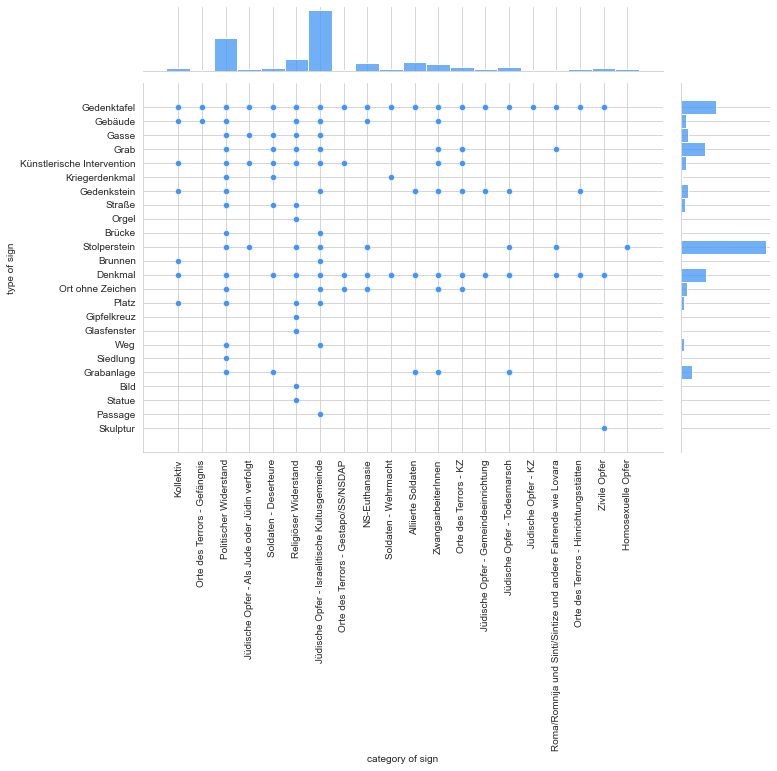

In [286]:
plt = sns.jointplot(data=derla_dfhier,x="category of sign", y="type of sign", color="#4295f5")
plt.figure.set_size_inches(10,7)
for tick in plt.ax_joint.get_xticklabels():tick.set_rotation(90)

### Count per state

In [288]:
# value counts per state as multi-hierarchical dataframe
counted_signs = derla_dfhier.groupby(["type of sign"])["state"].value_counts().to_frame()
counted_signs.columns = ["sum"]
counted_signs.to_csv("state_type_counts.csv")
counted_signs
# hierarchical counts - viz via rawgraphs

sum
type of sign               state     
Bild                       sty      1
Brunnen                    sty      1
                           vor      1
Brücke                     sty      1
                           vor      1
Denkmal                    sty     62
                           vor     11
Gasse                      sty     11
                           vor     11
Gebäude                    vor      9
                           sty      6
Gedenkstein                sty     14
                           vor      7
Gedenktafel                sty     70
                           vor     33
Gipfelkreuz                vor      1
Glasfenster                sty      2
                           vor      1
Grab                       sty     63
                           vor      7
Grabanlage                 sty     32
Kriegerdenkmal             sty      3
                           vor      2
Künstlerische Intervention vor     10
                           sty      5
Orgel                      vor      1
Ort ohne Zeichen           vor     15
                           sty      4
Passage                    sty      1
Platz                      sty     10
                           vor      1
Siedlung                   sty      1
Skulptur                   sty      1
Statue                     sty      1
Stolperstein               sty    233
                           vor     16
Straße                     sty      8
                           vor      4
Weg                        sty     10

Group by category of sign and type of sign

In [306]:
# group by category of sign and type of sign
grouped_cat = derla_dfhier.groupby(["category of sign", "type of sign"])["state"].value_counts().to_frame()
grouped_cat.columns = ["sum"]
grouped_cat.to_csv("double_grouped.csv")
# sns.lmplot(x="count", y='category of sign', data=grouped_cat)
grouped_cat


sum
category of sign    type of sign               state     
Alliierte Soldaten  Denkmal                    sty      6
                    Gedenkstein                sty      3
                                               vor      2
                    Gedenktafel                sty      5
                    Grabanlage                 sty     20
...                                                   ...
ZwangsarbeiterInnen Grab                       vor      1
                    Grabanlage                 sty      2
                    Künstlerische Intervention vor      3
                    Ort ohne Zeichen           vor      8
                                               sty      3

[139 rows x 1 columns]

### Group by super-category

try 

In [345]:
## sort by super - and sub category / by derla taxonomy
def extract_supercat(cat):
    """
    Assings supercategory to given place of remembrance
    """
    cat = cat.lower()
    if "widerstand" in cat.lower():
        return "widerstand"
    if "soldaten" in cat:
        return "soldaten"
    if "-" not in cat:
        return "allgemein"
    return cat.split(" -")[0]

# create multi-index
cat_list = list(derla_df["category of sign"].apply(extract_supercat))
tuples = zip(cat_list, range(0,len(cat_list)-1))
multi = pd.MultiIndex.from_tuples(tuples)

# create reindexed dataframe 
rehier = derla_df["category of sign"].to_frame().reindex(multi)
rehier.index.names = ["super_cat", "glob_count"]
rehier = rehier.sort_index()

# join missing data
joined = rehier.join(derla_df[["uri", "category of sign", "Name", "state", "category of sign"]], on="glob_count", lsuffix=":l")
joined = joined.dropna(axis=1, thresh=2)
joined.to_csv("taxonomy.csv")
joined.value_counts("super_cat")
grouped_cat


# joined = rehier.merge(grouped_cat, on="category of sign", suffixes=(":l", ":r"))
# joined = joined.dropna(axis=1, thresh=2)
# joined.to_csv("taxonomy.csv")
# joined.value_counts("super_cat")
# rehier

sum
category of sign    type of sign               state     
Alliierte Soldaten  Denkmal                    sty      6
                    Gedenkstein                sty      3
                                               vor      2
                    Gedenktafel                sty      5
                    Grabanlage                 sty     20
...                                                   ...
ZwangsarbeiterInnen Grab                       vor      1
                    Grabanlage                 sty      2
                    Künstlerische Intervention vor      3
                    Ort ohne Zeichen           vor      8
                                               sty      3

[139 rows x 1 columns]

## Collection research questions

Numerical (Distribution)
- are the places of remembrance evenly distributed? per state?

Spatial:
- are the places clustered or more distributed per state?

Time:
- distribution of dates?

Categorical:
- are there certain correlations between state and categories?
- how do states relate to different categories?